In [148]:
import warnings
warnings.filterwarnings('ignore')

In [149]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
#plt.rcParams['figure.figsize'] = (15.0,7.0)

In [150]:
house = pd.read_csv('kc_house_data.csv')
print(house.shape)
house.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [151]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [152]:
X = house.drop(['id','price','date','lat','long'],axis=1)
y = house.price

In [153]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


In [154]:
bestfeatures = SelectKBest(score_func=chi2,k=10)
fit = bestfeatures.fit(X,y)

In [155]:
house_score = pd.DataFrame(fit.scores_)
house_columns = pd.DataFrame(X.columns)

In [156]:
featurescores = pd.concat([house_columns,house_score],axis=1)
featurescores.columns = ['cols', 'score']

In [157]:
print(featurescores.sort_values('score'))

             cols         score
13        zipcode  1.247501e+02
7       condition  5.273119e+02
4          floors  1.123335e+03
0        bedrooms  1.540444e+03
11       yr_built  2.107843e+03
8           grade  2.391929e+03
1       bathrooms  2.721923e+03
5      waterfront  8.184489e+03
6            view  1.941399e+04
14  sqft_living15  2.772174e+06
10  sqft_basement  4.405627e+06
9      sqft_above  4.434142e+06
2     sqft_living  5.497592e+06
12   yr_renovated  9.283729e+06
15     sqft_lot15  1.873954e+08
3        sqft_lot  3.960291e+08


In [158]:
print(featurescores.nlargest(16,'score'))

             cols         score
3        sqft_lot  3.960291e+08
15     sqft_lot15  1.873954e+08
12   yr_renovated  9.283729e+06
2     sqft_living  5.497592e+06
9      sqft_above  4.434142e+06
10  sqft_basement  4.405627e+06
14  sqft_living15  2.772174e+06
6            view  1.941399e+04
5      waterfront  8.184489e+03
1       bathrooms  2.721923e+03
8           grade  2.391929e+03
11       yr_built  2.107843e+03
0        bedrooms  1.540444e+03
4          floors  1.123335e+03
7       condition  5.273119e+02
13        zipcode  1.247501e+02


In [177]:
top10_features = list(featurescores.nlargest(16,'score')['cols'])
top10_features.append('price')
top10_features

['sqft_lot',
 'sqft_lot15',
 'yr_renovated',
 'sqft_living',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'view',
 'waterfront',
 'bathrooms',
 'grade',
 'yr_built',
 'bedrooms',
 'floors',
 'condition',
 'zipcode',
 'price']

In [178]:
house_top10_features = house[top10_features]
house_top10_features.head()

,sqft_lot,sqft_lot15,yr_renovated,sqft_living,sqft_above,sqft_basement,sqft_living15,view,waterfront,bathrooms,grade,yr_built,bedrooms,floors,condition,zipcode,price
0,5650,5650,0,1180,1180,0,1340,0,0,1.00,7,1955,3,1.0,3,98178,221900.0
1,7242,7639,1991,2570,2170,400,1690,0,0,2.25,7,1951,3,2.0,3,98125,538000.0
2,10000,8062,0,770,770,0,2720,0,0,1.00,6,1933,2,1.0,3,98028,180000.0
3,5000,5000,0,1960,1050,910,1360,0,0,3.00,7,1965,4,1.0,5,98136,604000.0
4,8080,7503,0,1680,1680,0,1800,0,0,2.00,8,1987,3,1.0,3,98074,510000.0


In [179]:
house_top10_features.skew()

sqft_lot         13.060019
sqft_lot15        9.506743
yr_renovated      4.549493
sqft_living       1.471555
sqft_above        1.446664
sqft_basement     1.577965
sqft_living15     1.108181
view              3.395750
waterfront       11.385108
bathrooms         0.511108
grade             0.771103
yr_built         -0.469805
bedrooms          1.974300
floors            0.616177
condition         1.032805
zipcode           0.405661
price             4.024069
dtype: float64

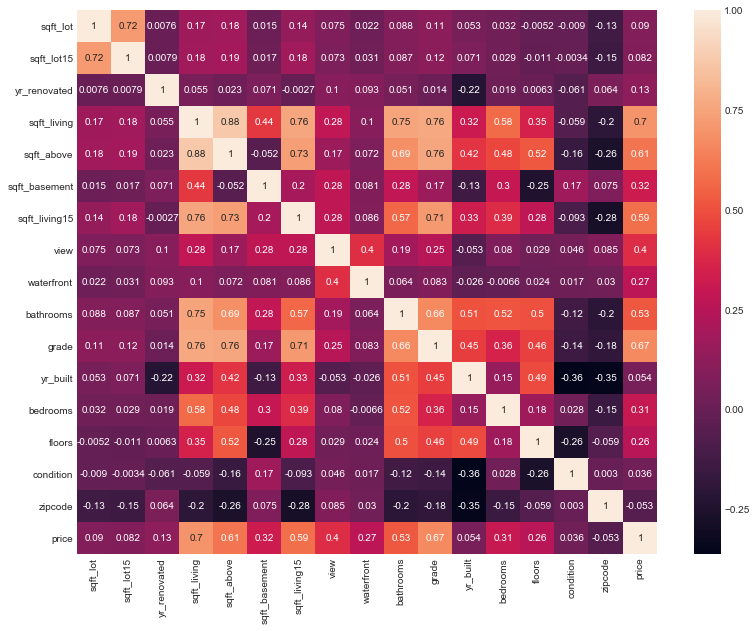

In [180]:
plt.figure(figsize=(13,10))
sns.heatmap(house_top10_features.corr(),annot=True)

In [181]:
X = house_top10_features.drop('price',axis=1)
y = house_top10_features.price

In [182]:
from sklearn.model_selection import train_test_split

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [184]:
import statsmodels.api as sm

In [185]:
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train,X_train_sm).fit()

In [186]:
print(lr.params)
print(lr.summary())

const            7.043719e+06
sqft_lot        -3.684718e-02
sqft_lot15      -4.932186e-01
yr_renovated     1.312557e+01
sqft_living      1.116332e+02
sqft_above       5.237982e+01
sqft_basement    5.925172e+01
sqft_living15    2.066220e+01
view             4.442942e+04
waterfront       5.409844e+05
bathrooms        4.412457e+04
grade            1.184272e+05
yr_built        -3.535060e+03
bedrooms        -3.857270e+04
floors           2.670574e+04
condition        1.523469e+04
zipcode         -9.082761e+00
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     1903.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:47:49   Log-Likelihood:            -2.0706e+05
N

In [187]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [188]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
print(vif)

         Features         VIF
4     sqft_living         inf
5      sqft_above         inf
6   sqft_basement         inf
0           const  4561995.41
10      bathrooms        3.35
11          grade        3.24
7   sqft_living15        2.89
12       yr_built        2.23
2      sqft_lot15        2.12
1        sqft_lot        2.10
14         floors        2.01
13       bedrooms        1.64
8            view        1.40
16        zipcode        1.31
15      condition        1.25
9      waterfront        1.19
3    yr_renovated        1.15


In [189]:
from sklearn.metrics import r2_score

In [190]:
y_train_pred_sm = lr.predict(X_train_sm)

In [191]:
r2_score(y_train,y_train_pred_sm)

0.6538644117915747

In [192]:
X_test_sm = sm.add_constant(X_test)

In [193]:
y_test_pred_sm = lr.predict(X_test_sm)

In [194]:
r2_score(y_test,y_test_pred_sm)

0.6527693119261089